# A5 (10 Marks)
---
**Focus**: CUDA(A, B) - Introduction (warming up!!)
Updated by A K M Amanat Ullah and Tanmaya Karmakar
adapted from
© Dr. Abdallah Mohamed 2023

This version of the assignment is the Google Colab version and takes advantage of the free Cloud GPUs offered through the platform. Colab Notebooks (you're reading one right now!) are typically designed to run Python code, however, we'll be modifying them in such a way that we can run CUDA code (as discussed in the lectures) on the GPU.

Keep in mind that anytime your runtime disconnects or is restarted **you must re-run the Notebook Setup code block**. This applies to all CUDA assignments done using Google Colab.

The NVIDIA System Management Interface (nvidia-smi) is a command line utility, based on top of the NVIDIA Management Library (NVML), intended to aid in the management and monitoring of NVIDIA GPU devices.

In [ ]:
!nvidia-smi

Wed Mar  5 23:07:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


## Question 1. [+3]

Querying your GPU: In this question, you will run simple query code to discover the properties and limits of your Colab-provisioned NVIDIA card. Run the code block below, then capture your answers and **submit** them as an image file named A5_Q1.png.


*Marking Guide: +3 for a screenshot with the required info*


Uploading Files to the Notebook.
Click on the orange rectangle on the left to upload files from your hardisk

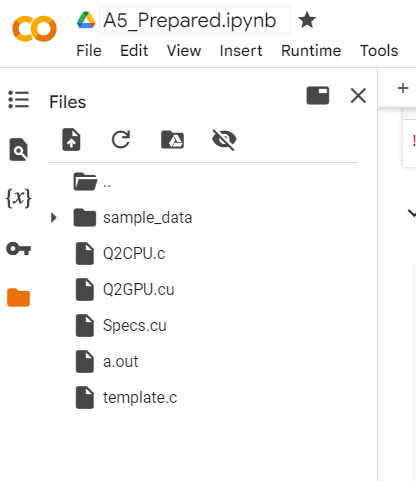

## For Q1 Copy the following code into Specs.cu

```
#include "cuda_runtime.h"
#include "device_launch_parameters.h"
#include <stdio.h>

int main()
{
    cudaDeviceProp prop;
    int count;
    cudaGetDeviceCount(&count);
    for (int i = 0; i < count; i++)
    {
        cudaGetDeviceProperties(&prop, i);
        printf("----- General Information for device %d ---\n", i);
        printf("Name:	%s\n", prop.name);
        printf("Compute capability:	%d.%d\n", prop.major, prop.minor);
        printf("Clock rate:	%d\n", prop.clockRate);
        printf("Device copy overlap:	");
        printf(prop.deviceOverlap ? "Enabled\n" : "Disabled\n");
        printf("Kernel execution timeout: ");
        printf(prop.kernelExecTimeoutEnabled ? "Enabled\n" : "Disabled\n");
        printf("----- Memory Information for device %d ---\n", i);
        printf("Total global mem:	%lu\n", prop.totalGlobalMem);
        printf("Total constant Mem:	%ld\n", prop.totalConstMem);
        printf("Max mem pitch:	%ld\n", prop.memPitch);
        printf("Texture Alignment:	%ld\n", prop.textureAlignment);
        printf("----- MP Information for device %d ---\n", i);
        printf("Multiprocessor count:	%d\n", prop.multiProcessorCount);
        printf("Shared mem per mp:	%ld\n", prop.sharedMemPerBlock);
        printf("Registers per mp:	%d\n", prop.regsPerBlock);
        printf("Threads in warp:	%d\n", prop.warpSize);
        printf("Max threads per block:	%d\n", prop.maxThreadsPerBlock);
        printf("Max thread dimensions:	(%d, %d, %d)\n",
               prop.maxThreadsDim[0], prop.maxThreadsDim[1], prop.maxThreadsDim[2]);
        printf("Max grid dimensions:	(%d, %d, %d)\n", prop.maxGridSize[0], prop.maxGridSize[1], prop.maxGridSize[2]);
        printf("\n");
    }
    return 0;
}

```


Upload Specs.cu from your computer you create a empty file and edit it here on Google Colab. After having Specs.cu ready you can run the following code execute the code

In [ ]:
!nvcc -arch=sm_75 /content/Specs.cu

Run a.out to see the output.

In [ ]:
!./a.out

----- General Information for device 0 ---
Name:    Tesla T4
Compute capability:    7.5
Clock rate:    1590000
Device copy overlap:    Enabled
Kernel execution timeout: Disabled
----- Memory Information for device 0 ---
Total global mem:    15828320256
Total constant Mem:    65536
Max mem pitch:    2147483647
Texture Alignment:    512
----- MP Information for device 0 ---
Multiprocessor count:    40
Shared mem per mp:    49152
Registers per mp:    65536
Threads in warp:    32
Max threads per block:    1024
Max thread dimensions:    (1024, 1024, 64)
Max grid dimensions:    (2147483647, 65535, 65535)



### Template to use for CPU Implementation

Please write your code in a .c file. Upload, compile and run your implementation here. Submit the .c file.

In [ ]:
!nvcc -arch=sm_75 /content/template.c

In [ ]:
!./a.out

a[0]: 5.000000 
a[1]: 5.000000 
a[2]: 5.000000 
a[3]: 5.000000 
a[4]: 5.000000 
... 
a[9999995]: 5.000000 
a[9999996]: 5.000000 
a[9999997]: 5.000000 
a[9999998]: 5.000000 
a[9999999]: 5.000000 


## Question 2. [+7]

**Simple CUDA code:** consider this loop for initializing an array **a**:

```c
const int n = 10000000 // 10 million
for (i = 0; i < n; i++)
    a[i] = (double)i / n;
```

Submit:

1.   The serial implementation running on the CPU.
2.   The CUDA implementation (1 thread per array element).

In both cases, add code to print the first and last 5 elements of the array to verify your code.

*Note that you need to use the placeholder %.7f to print 7 digits after the decimal point.*

***Sample output:***

```c
a[0]: 0.0000000
a[1]: 0.0000001
a[2]: 0.0000002
a[3]: 0.0000003
a[4]: 0.0000004
...
a[9999995]: 0.9999995
a[9999996]: 0.9999996
a[9999997]: 0.9999997
a[9999998]: 0.9999998
a[9999999]: 0.9999999
Time to complete: 0.5985 seconds
```

***Marking Guide:***

+2 for measuring the time of the parallel and serial code

+2 for the kernel function

+3 for launch configuration and properly calling the kernel



### Your Turn: Do the CPU Implementation for the following code
```
const int n = 10000000 // 10 million
for (i = 0; i < n; i++)
    a[i] = (double)i / n;

```
Please write your code in a .c file. Upload, compile and run your implementation here. Submit the .c file.

Upload CPU.c

In [ ]:
!nvcc -arch=sm_75 /content/Q2CPU.c


Run code to check answers.

In [ ]:
!./a.out

a[0]: 0.0000000 
a[1]: 0.0000001 
a[2]: 0.0000002 
a[3]: 0.0000003 
a[4]: 0.0000004 
... 
a[9999995]: 0.9999995 
a[9999996]: 0.9999996 
a[9999997]: 0.9999997 
a[9999998]: 0.9999998 
a[9999999]: 0.9999999 


### CUDA Implementation

Please write your code in a .cu file. Upload, compile and run your CUDA implementation here. Submit the cu file.

Upload Gpu code Q2GPU.cu

Run Gpu code

In [ ]:
!nvcc -arch=sm_75 /content/Q2GPU.cu

In [ ]:
!./a.out

Element at index 0: 0.0000000
Element at index 1: 0.0000001
Element at index 2: 0.0000002
Element at index 3: 0.0000003
Element at index 4: 0.0000004
Element at index 9999995: 0.9999995
Element at index 9999996: 0.9999996
Element at index 9999997: 0.9999997
Element at index 9999998: 0.9999998
Element at index 9999999: 0.9999999


---

**Submission instructions**

For this assignment, you need to do the following:
1. you have to submit the .ipynb file and the zipped version of following files
- screenshot_spec.png
- screenshot_CPUQ2_output.png
- screenshot_GPUQ2_output.png
- Specs.cu
- CPUQ2.c  
- GPUQ2.cu
2. Donwload the .ipynb file file> Download> Download .ipynb
3. Compress all files (.c, .cu and .png) into one zip file and submit the zip file. the PNG file from Q1 and Q2 and the source code file (i.e. the .cu/c files) from Q2 into one zip folder and give a name to the zipped file that matches your ID (e.g., 1234567.zip).

4. Submit the .ipynb file and zipped file to Canvas.

Note that you can resubmit an assignment, but the new submission overwrites the old submission and receives a new timestamp.